# MPCS 53111 - homework 6

## Question 3 

### (a) 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
%matplotlib inline
mpl.rc('figure', figsize=[12,8])  #set the default figure size

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import rbf_kernel

# LWRegressor 
class LWRegressor(sklearn.base.RegressorMixin):
    
    def __init__(self, k):
        self.k = k
        super().__init__()
        
    def fit(self, X,y):
        self.X = X
        self.y = y
        self.nn = NearestNeighbors(n_neighbors=self.k)
        self.nn.fit(X.reshape(-1,1))
    
    def predict(self, T, gamma):
        predictions = []
        _, neighbors = self.nn.kneighbors(T)
        regressor = LinearRegression()
        
        for i in range(T.shape[0]):
            
            # contains the current independent value
            # so distant = rbf_kernel(self.X[neighbors[i]],independent_variable)
            independent_variable = np.array([T[i] for j in range(len(neighbors[i]))])
            
            # rbf_kernel
            distance = rbf_kernel(self.X[neighbors[i]],independent_variable,gamma=gamma)

            regressor.fit(self.X[neighbors[i]], self.y[neighbors[i]],distance[:,0])
            predictions.append(regressor.predict([T[i]]))
            
        return np.asarray(predictions)
    
# starter function KNNRegressor
class KNNRegressor(sklearn.base.RegressorMixin):
    
    def __init__(self, k):
        self.k = k
        super().__init__()
        
    def fit(self, X,y):
        self.X = X
        self.y = y
        self.nn = NearestNeighbors(n_neighbors=self.k)
        self.nn.fit(X.reshape(-1,1))
        
    def predict(self, T):
        predictions = []
        _, neighbors = self.nn.kneighbors(T)
        regressor = LinearRegression()
        for i in range(T.shape[0]):
            regressor.fit(self.X[neighbors[i]], self.y[neighbors[i]])
            predictions.append(regressor.predict([T[i]]))
        return np.asarray(predictions)

In [2]:
def f_func(x):
        return 3.0 + 4.0 * x - 0.05 * x**2

def generate_data(size=200):
    X = np.sort(np.random.random(size) * 100)
    y = f_func(X) + (np.random.random(size) - 0.5) * 50
    return(X,y)

### part (b)

Notice that if gamma for LWRegressor is set to 1/40, then the plottings of LWRegressor and that of KNNRegressor are actually overlay, which seems like there is only one plot line. If gamma is set to larger value(e.g 2) then the two plotting are distinguishable from each other. 

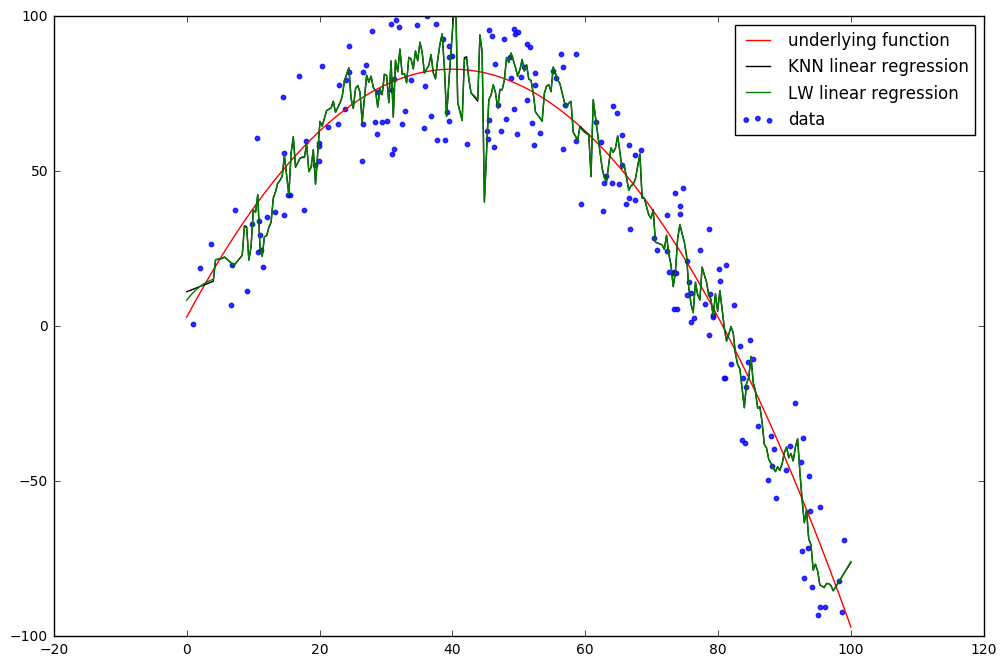

In [3]:
# PART (b)

u = np.linspace(0,100,300)
f = f_func(u)
X, y = generate_data()

# CALL LW regressor 
lw_reg = LWRegressor(5)
lw_reg.fit(X.reshape(-1,1), y)
lw_predictions = lw_reg.predict(u.reshape(-1,1),1/40) #last parameter is gamma

# CALL KNN regressor
knn_reg = KNNRegressor(5)
knn_reg.fit(X.reshape(-1,1), y)
knn_predictions = knn_reg.predict(u.reshape(-1,1))

plt.plot(u,f, 'r', label='underlying function')
plt.scatter(X, y, s=10, color='b', alpha=0.8, label='data')
plt.plot(u,knn_predictions, color='black', label='KNN linear regression')
plt.plot(u,lw_predictions, color='g', label='LW linear regression')
plt.ylim(-100,100)
plt.legend()

### part(c)

For this part, I'm using absolute difference between predicted value and true to gauge the accuracy of prediction.

The following plot for KNN model, takes about 30 seconds to run. As can be seen, if we choose k to be the minimum point then it should be around 25 - 40. Or we could print out the k that makes the minimum prediction error, which is randomly between 26 -30.

Plotting between gamma and prediction error for LW nearest neighbors shows that gamma ls generally the smaller the better. 

So for this specific artifical datasets, I think KNN is well enough for it. Because it seems like the global minimum prediction errors for both models are identical. So seems like local weights regression doesn't make it better in terms of reducing prediction error, if the following two plots are correct. So why do the extra computation by using local weight regression for nearest neighbors. 

global minimum k:  27


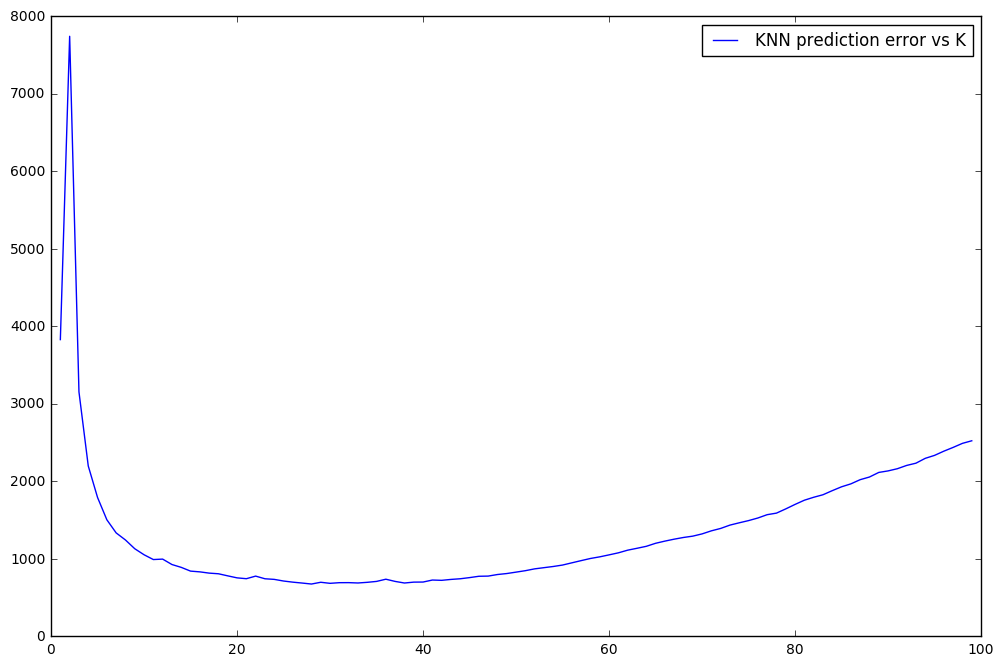

In [4]:
# number of nearest neighbors
k = np.array([i for i in range(1,100)])

# predicting errors for each k
result = []

for i in k:
    
    knn_reg = KNNRegressor(i)
    knn_reg.fit(X.reshape(-1,1), y)
    knn_predictions = knn_reg.predict(u.reshape(-1,1))
    
    # prediction errors.
    result.append(np.abs(knn_predictions-f.reshape(len(f),1)).sum())

result = np.array(result)
plt.plot(k,result,label="KNN prediction error vs K")
plt.legend()
print("global minimum k: ",list(result).index(min(list(result))))

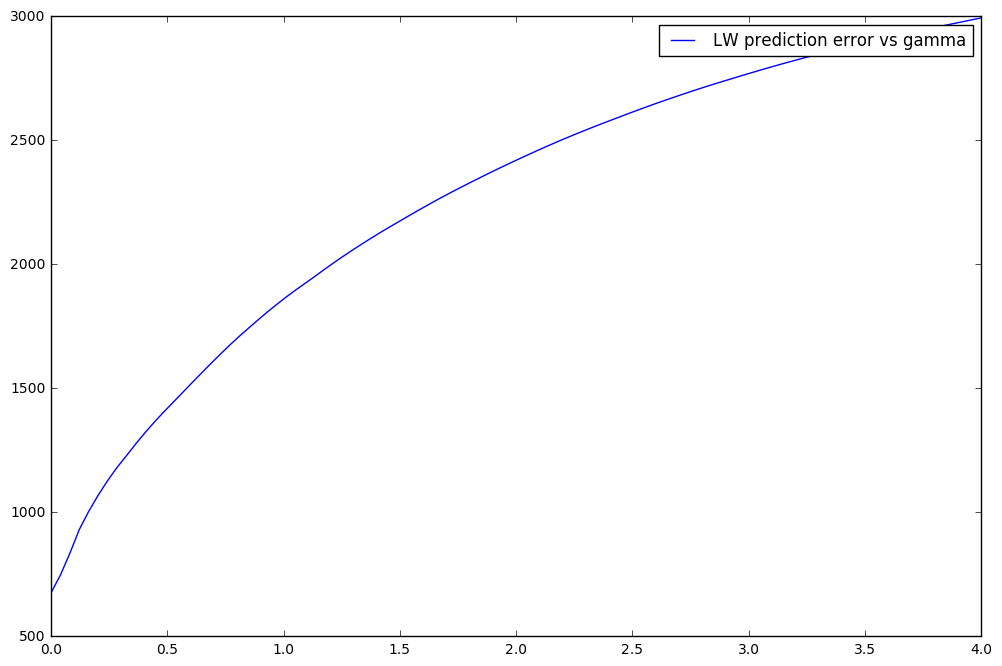

In [5]:
# number of nearest neighbors
gamma = np.linspace(0,4,100)

# predicting errors for each k
result = []

for i in gamma:
    
    # since KNN model already shows that when k = 25 -30, prediction error is minimized.
    # I would use one of them as K for LW. 
    lw_reg = LWRegressor(28)
    lw_reg.fit(X.reshape(-1,1), y)
    lw_predictions = lw_reg.predict(u.reshape(-1,1),i)
    
    # prediction errors.
    result.append(np.abs(lw_predictions-f.reshape(len(f),1)).sum())

result = np.array(result)
plt.plot(gamma,result,label="LW prediction error vs gamma")
plt.legend()

# question 4

###  (a)

I would choose an arbitrage line to divide the two class of data, which is formed by connecting (3.8,7) and (2.8,0), assuming in x-y coordinates rather than x1-x2 coordinates. The line could be roughly written as y = 7*x - 19.6. So the candidates of the nearest points visually are (3,4.5) and (3.5,2). After computing the distance between the two points and the line separator, the point with minimum distance to the line is the point (3.5,2), which is around 0.41.

distance between (3,4.5) and y = 7*x - 19.6:
 0.438406204336
distance between (3.5,2) and y = 7*x - 19.6:
 0.410121933088


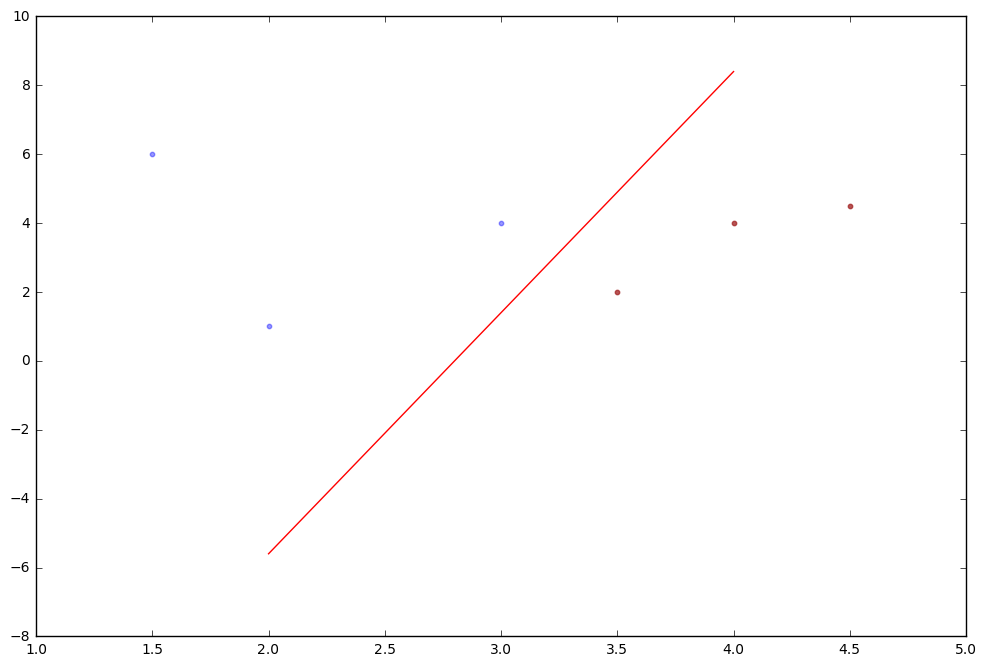

In [6]:
x_negative = [1.5,2,3]
x_positive = [3.5,4,4.5]
y_negative = [6,1,4]
y_positive = [2,4,4.5]

separator_x = np.linspace(2,4,20)
separator_y = (7.0)*separator_x-19.6 

distance_1 = np.abs(3*7 - 4.5 - 19.6)/np.sqrt(7**2+1)
distance_2 = np.abs(3.5*7 - 2 - 19.6)/np.sqrt(7**2+1)

print("distance between (3,4.5) and y = 7*x - 19.6:\n",distance_1)
print("distance between (3.5,2) and y = 7*x - 19.6:\n",distance_2)

plt.plot(separator_x,separator_y, 'r', label='underlying function')
plt.scatter(x_negative, y_negative, s=10, color='b', alpha=0.4, label='negative data')
plt.scatter(x_positive, y_positive, s=10, color='brown', alpha=0.8, label='positive data')
plt.show()

# part (b)

Summarizing the results given below, classification function given be SVC() is like: 

$ y = g(2*x_1-0.5*x_2 - 5)$

where y = 1 if 2*x_1-0.5*x_2 - 5 >0 and y = 0, otherwise. [2,-0.5] is given by clf.coef_ and [-5] given by clf.intercept_

distance of closet example is 0.99972861, which corresponds to point (3,4). 

Notice, to plot the separator line, I'm converting the function $ y = g(2*x_1-0.5*x_2 - 5)$ to x-y axis manually. So the plotted separator line is different from the function y = g(2*x_1-0.5*x_2 - 5)$, given by SVC(), which is necessary because they are in different axis coordinates. The conversion can be done by getting two points, (2.5,0) and (2.75,0), with coordinates in form of (x1,x2) on the linear separator by trial the function y = g(2*x_1-0.5*x_2 - 5)$ given by SVC(), and form a new line in coordinates in forms of (x,y). By manual computation it should be:  y = 4*x -10 

coef_: [[ 1.99959292 -0.49989823]]
intercept_: [-4.99891444]
distance of closet example: 0.999728611168


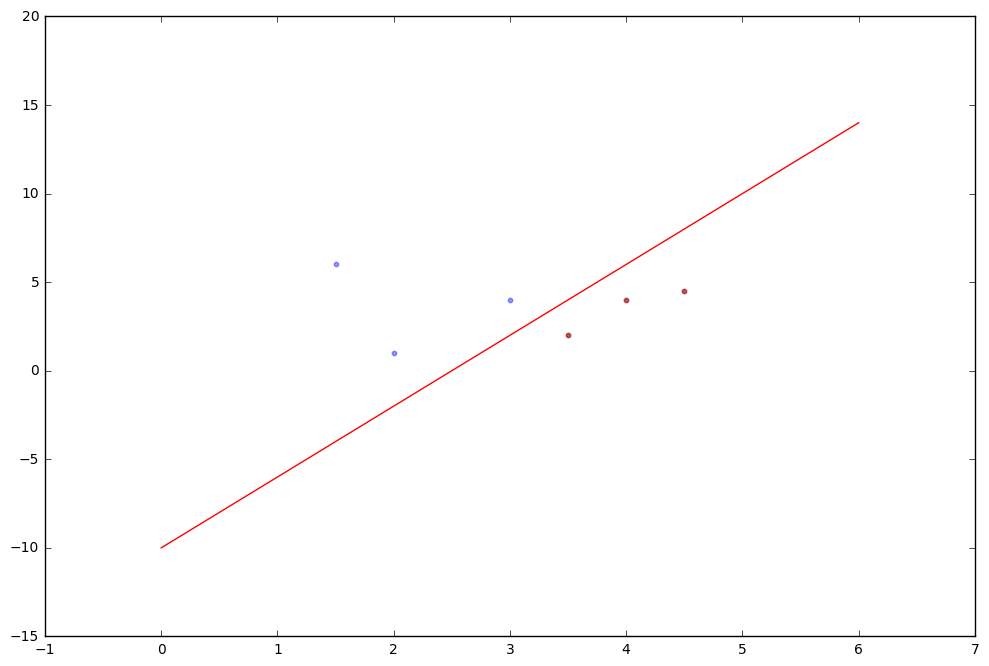

In [193]:
from sklearn.svm import SVC
x_negative = [1.5,2,3]
x_positive = [3.5,4,4.5]
y_negative = [6,1,4]
y_positive = [2,4,4.5]
x = np.array([[1.5,6],[2,1],[3,4],[3.5,2],[4,4],[4.5,4.5]])
label = np.array([-1,-1,-1,1,1,1])

clf = SVC(C=100,kernel='linear')
clf.fit(x,label)

print("coef_:",clf.coef_)
print("intercept_:",clf.intercept_)
print("distance of closet example:", np.abs(clf.decision_function(x)).min())

# converting from x1-x2 coordinates to x-y
separator_x = np.linspace(0,6,30)
separator_y = 4*separator_x-10

plt.plot(separator_x,separator_y, 'r', label='underlying function')
plt.scatter(x_negative, y_negative, s=10, color='b', alpha=0.4, label='negative data')
plt.scatter(x_positive, y_positive, s=10, color='brown', alpha=0.8, label='positive data')
plt.show()

# Part (c)

Repeating part(a): point e moves left by 1.5 in coordinates. If we were to guess a linear separator using the naive visual verification, I would choose the same linear function  y = 7*x - 19.6, because the frontier of negative and positive groups relatively stays the same. So the same function should work. 

Repeating part(b): Now, the separator function given by SVC() is different because intuitively, e points is not longer belongs to SVM vectors, since it moves further away from the linear separator line. The new SVM function is: 

$ y = g(2*x_1 - 7)$

where y = 1 if 2*x_1 - 7 >0 and y = 0, otherwise. [2,0] is given by clf.coef_ and [-7] given by clf.intercept_ . 

The new linear separator function written in x-y coordinates is now a vertical line to the x-axis.: x = 3.5 

The new distance is now 1. 

coef_: [[ 2.  0.]]
intercept_: [-7.]
distance of closet example: 1.0


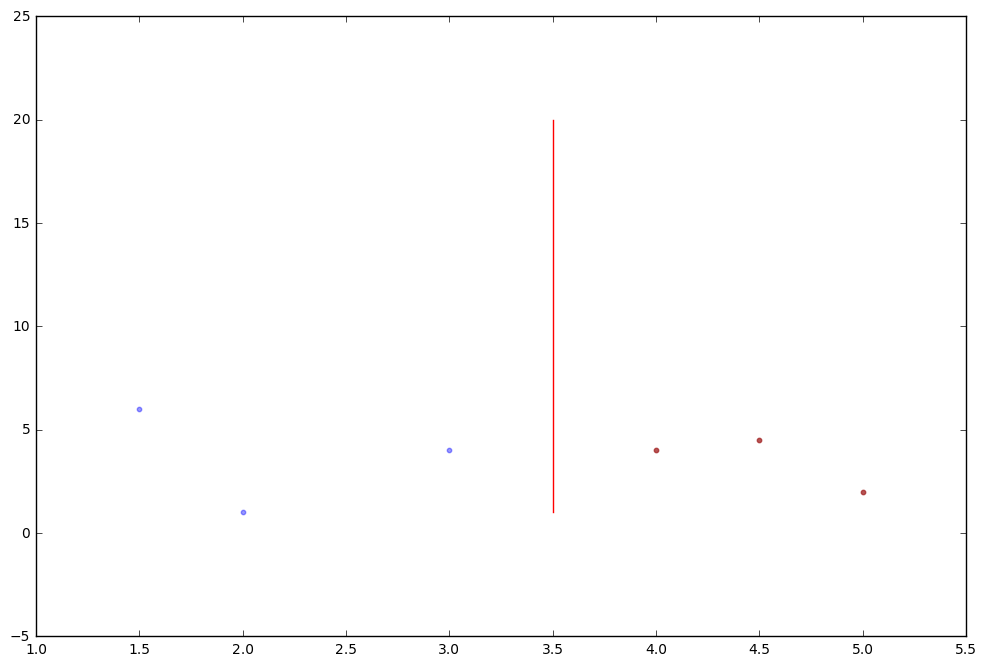

In [194]:
from sklearn.svm import SVC
x_negative = [1.5,2,3]
x_positive = [5,4,4.5]
y_negative = [6,1,4]
y_positive = [2,4,4.5]
x = np.array([[1.5,6],[2,1],[3,4],[5,2],[4,4],[4.5,4.5]])
label = np.array([-1,-1,-1,1,1,1])

clf = SVC(C=100,kernel='linear')
clf.fit(x,label)

print("coef_:",clf.coef_)
print("intercept_:",clf.intercept_)
print("distance of closet example:", np.abs(clf.decision_function(x)).min())

# converting from x1-x2 coordinates to x-y
separator_x = np.linspace(3.5,3.5,50)
separator_y = 0*separator_x + np.linspace(1,20,50)

plt.plot(separator_x,separator_y, 'red', label='underlying function')
plt.scatter(x_negative, y_negative, s=10, color='b', alpha=0.4, label='negative data')
plt.scatter(x_positive, y_positive, s=10, color='brown', alpha=0.8, label='positive data')
plt.show()

# Part (d) 

So according to the plotting, C=0.1 is so soft that all data points are actually bad. C=10 slightly mitigate the problem. While C=10 is hard enough to pull all data point out of the margin zone. 

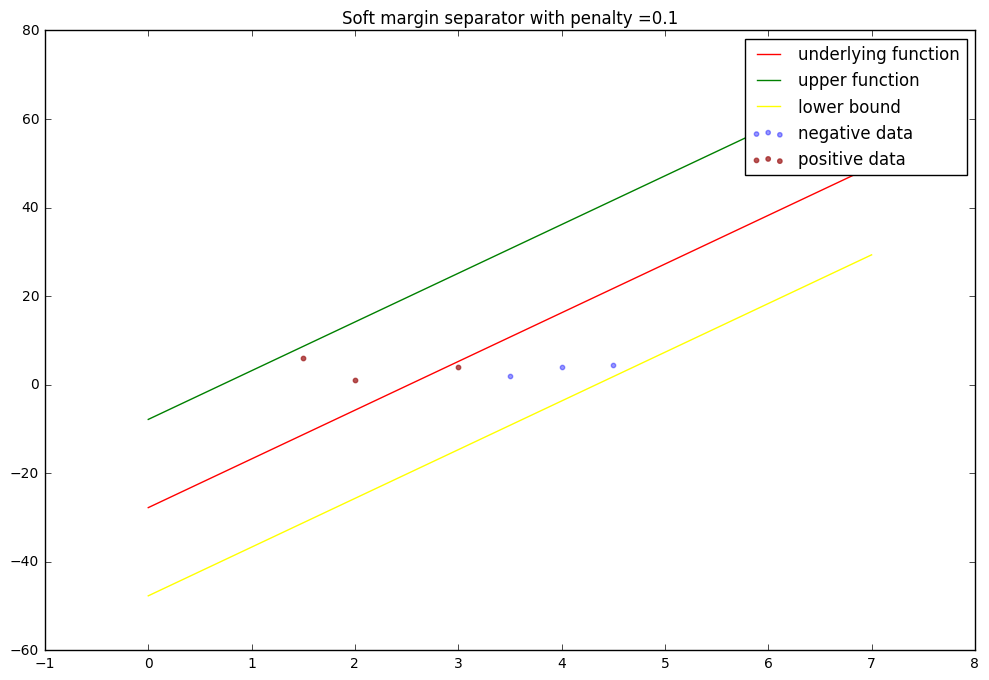

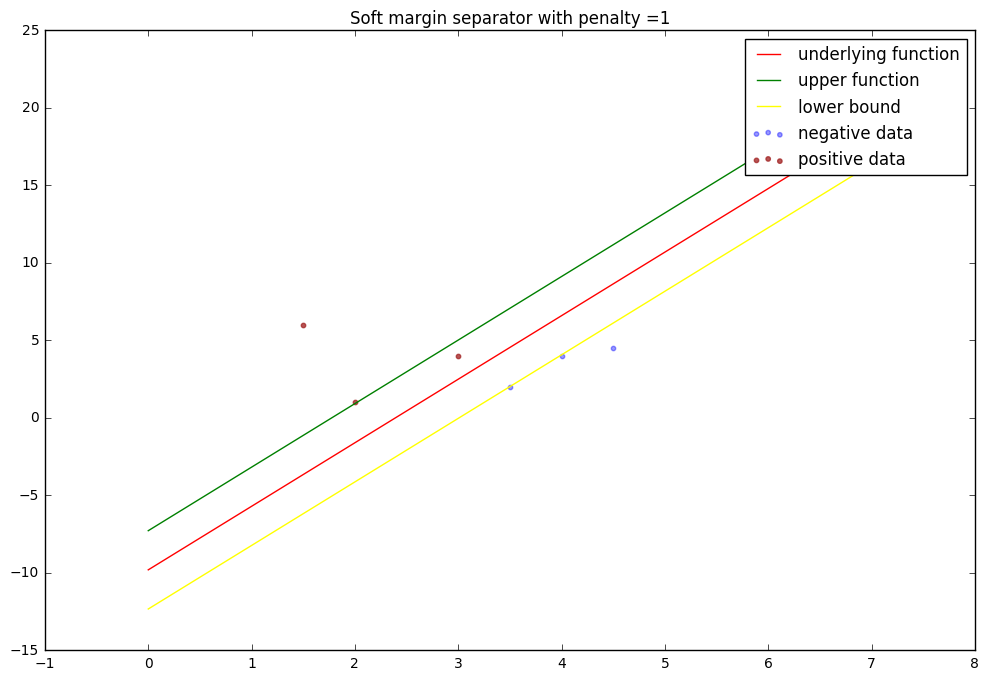

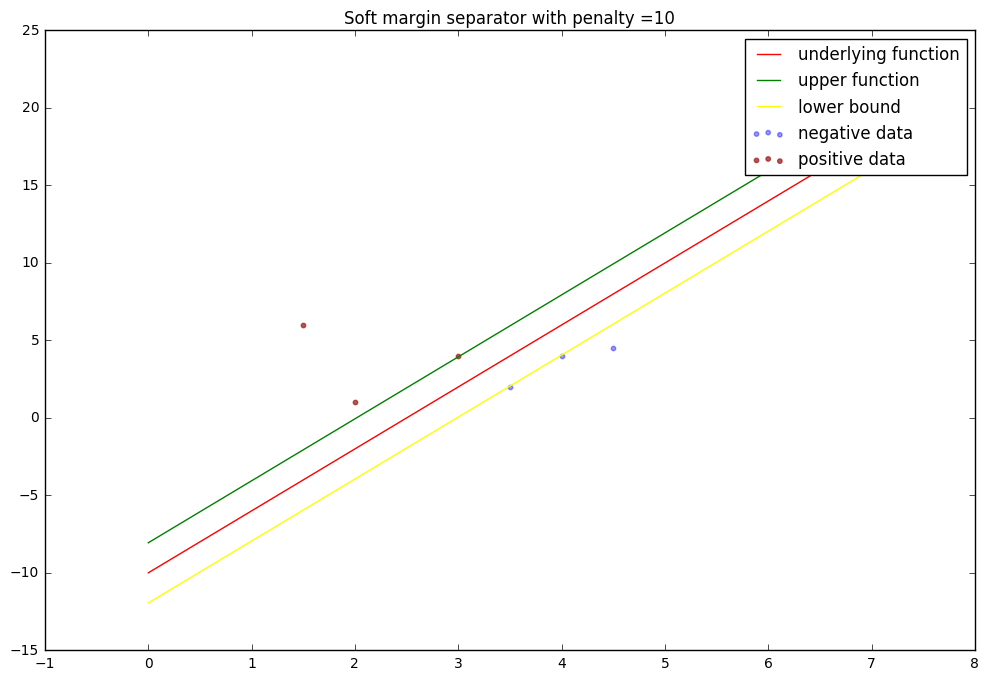

In [236]:
x_positive = [1.5,2,3]
x_negative = [3.5,4,4.5]
y_positive = [6,1,4]
y_negative = [2,4,4.5]
x = np.array([[1.5,6],[2,1],[3,4],[3.5,2],[4,4],[4.5,4.5]])
label = np.array([1,1,1,-1,-1,-1])

for penalty in [0.1,1,10]:
    # fit the model
    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(x, label)
    w = clf.coef_[0]
    a = -w[0] / w[1]
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))

    separator_x = np.linspace(0,7,60)
    separator_y = a * separator_x - (clf.intercept_[0]) / w[1]
    separator_y_down = separator_y + a * margin
    separator_y_up = separator_y - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(separator_x,separator_y, 'red', label='underlying function')
    plt.plot(separator_x,separator_y_down,'green', label='upper function')
    plt.plot(separator_x,separator_y_up,'yellow', label='lower bound')

    plt.scatter(x_negative, y_negative, s=10, color='b', alpha=0.4, label='negative data')
    plt.scatter(x_positive, y_positive, s=10, color='brown', alpha=0.8, label='positive data')
    plt.legend()
    title = 'Soft margin separator with penalty ='+ str(penalty)
    plt.title(title)
    plt.show()

# Part (e) - rbf kernel

according to the following plots, the margin zone changes both when either C or gamma change, though changes when C change is not so obvious. So below I will 4 plots to reflect the effects on both parameters. C =[0.1,100] and gamma = [1,10]

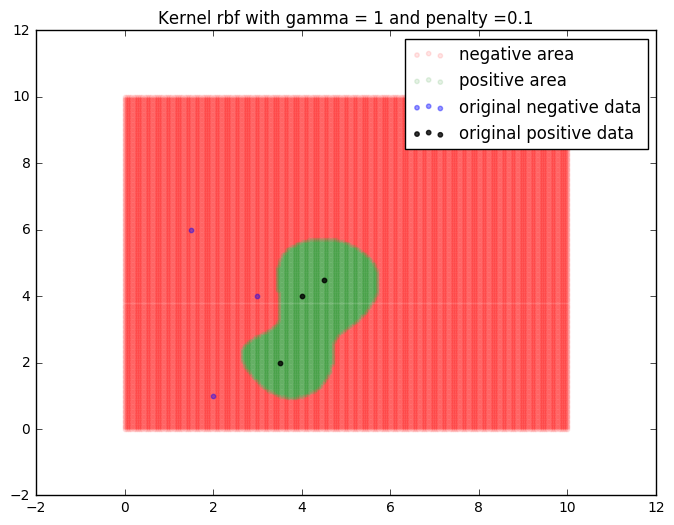

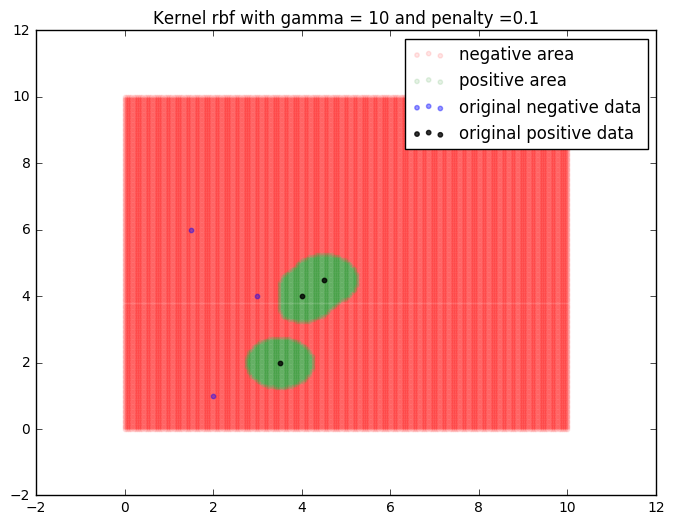

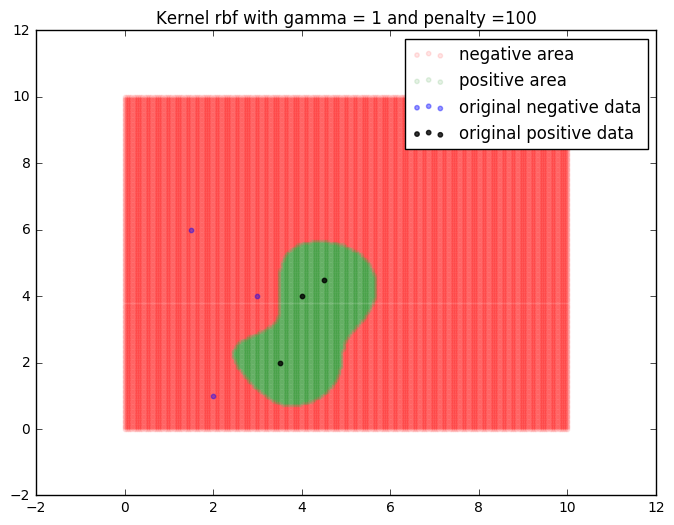

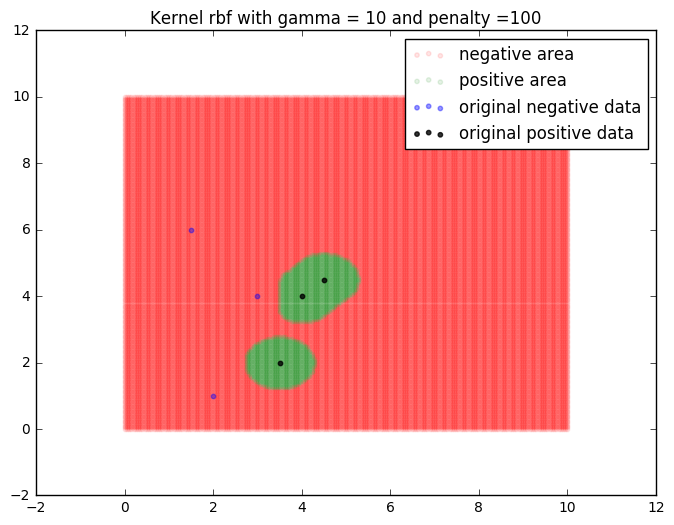

In [363]:
x = np.array([[1.5,6],[2,1],[3,4],[3.5,2],[4,4],[4.5,4.5]])
label = np.array([-1,-1,-1,1,1,1])
x_negative = [1.5,2,3]
x_positive = [3.5,4,4.5]
y_negative = [6,1,4]
y_positive = [2,4,4.5]

x1= np.linspace(0,10,200)
x2= np.linspace(0,10,200)
x_test = []

# craete a mesh (x1,x2)
for i in range(len(x1)):
    for j in range(len(x2)):
        x_test.append([x1[i],x2[j]])

x_test = np.array(x_test)

for penalty in [0.1,100]:
    
    for gamma in [1,10]:
    
        clf = svm.SVC(kernel='rbf', gamma=gamma,C=penalty)
        clf.fit(x, label)

        x1= np.linspace(0,10,200)
        x2= np.linspace(0,10,200)

        x_test_negative = x_test[y_test==-1]
        y_test_negative = y_test[y_test==-1]
        x_test_positive = x_test[y_test==1]
        y_test_positive = y_test[y_test==1]
        plt.figure(figsize=(8,6))
        plt.scatter(x_test_negative[:,0], x_test_negative[:,1], s=10, color='red', alpha=0.1, label='negative area')
        plt.scatter(x_test_positive[:,0], x_test_positive[:,1], s=10, color='green', alpha=0.1, label='positive area')

        plt.scatter(x_negative, y_negative, s=10, color='b', alpha=0.4, label='original negative data')
        plt.scatter(x_positive, y_positive, s=10, color='black', alpha=0.8, label='original positive data')
        title = 'Kernel rbf with gamma = ' + str(gamma) + ' and penalty ='+ str(penalty)
        plt.title(title)
        plt.legend()
        plt.show()

# Part (e) - ploy kernel

Again, the parameters in play now are gamma, degree and penalty. So for comparison, I'm plotting several pictures with varying parameters so I'm sorry you have to go back and forth to make comparisons you are interested in.  

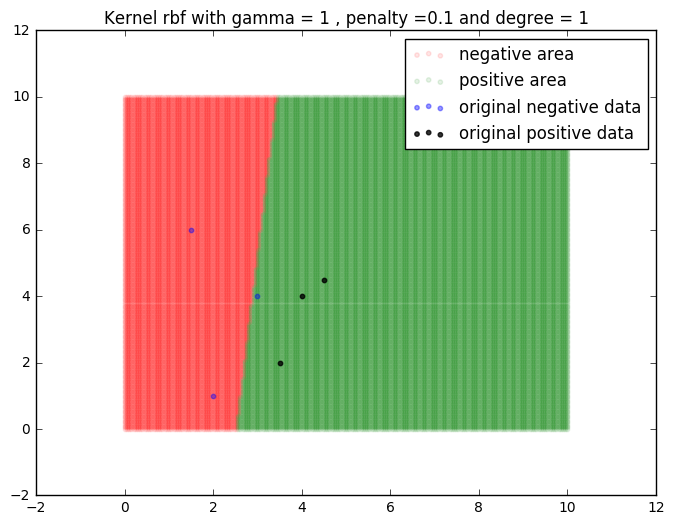

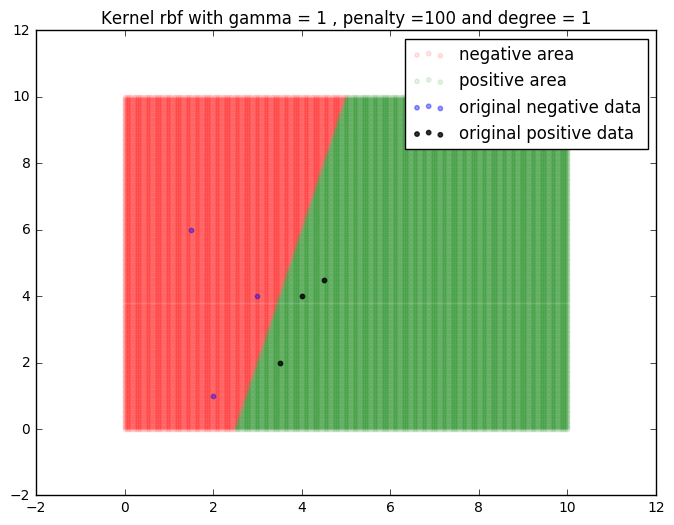

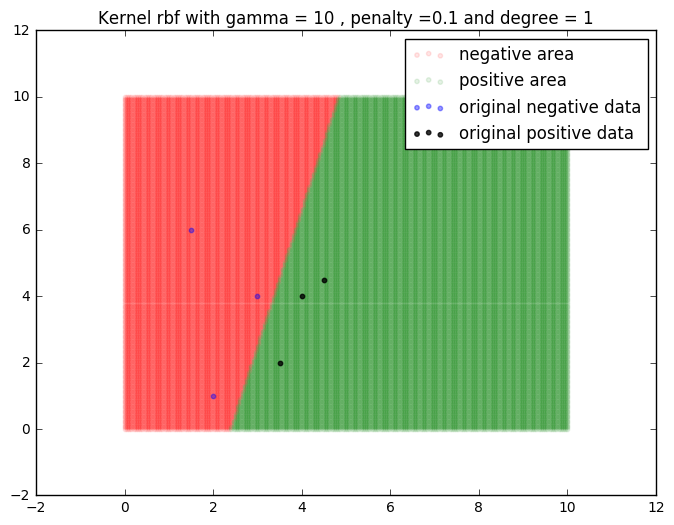

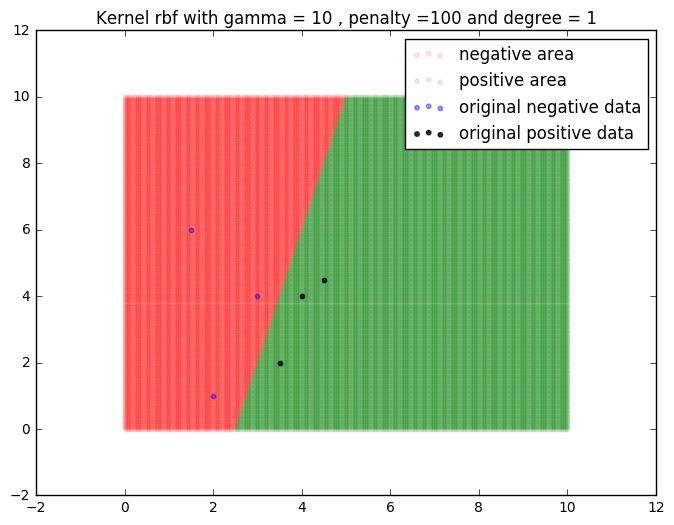

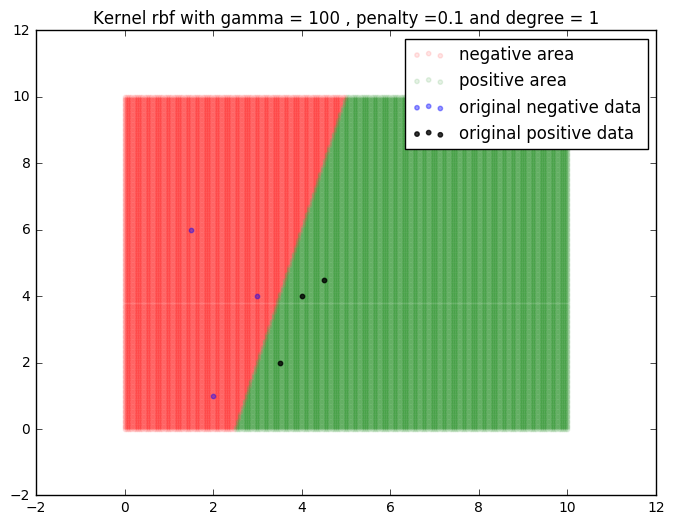

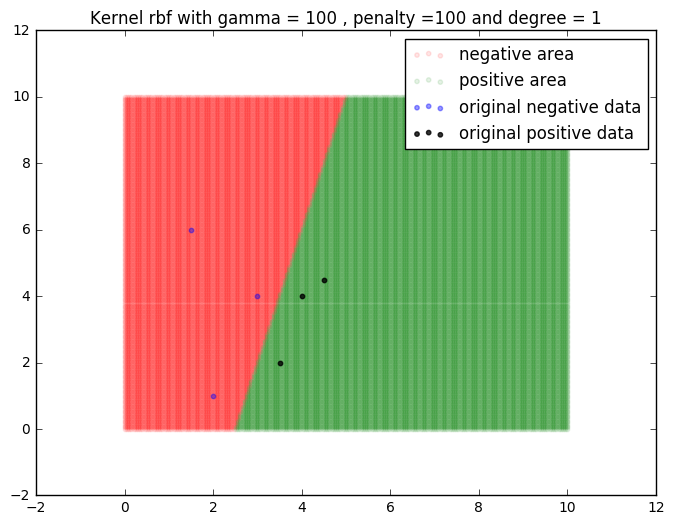

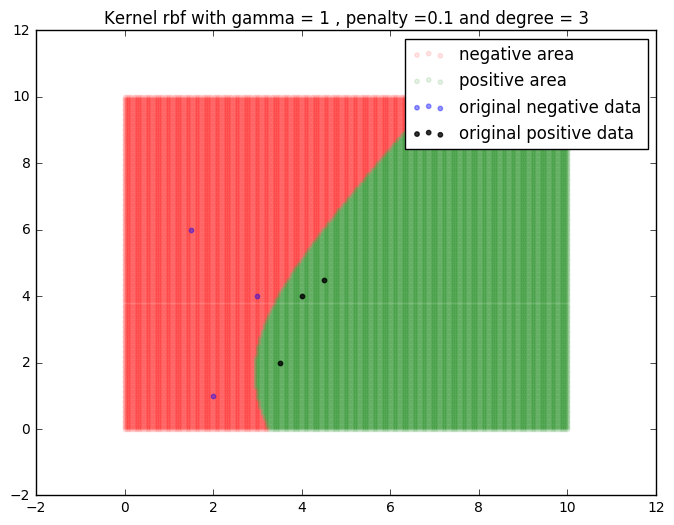

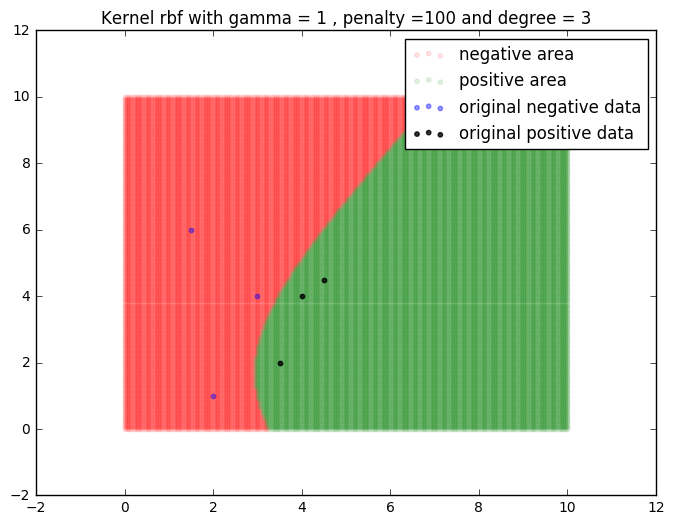

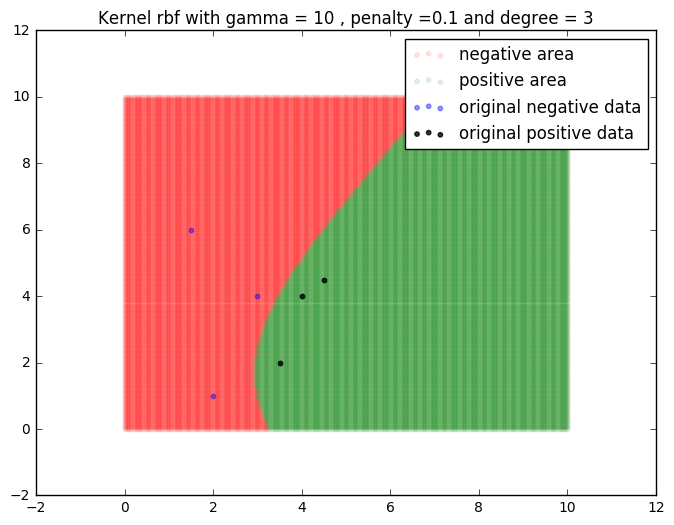

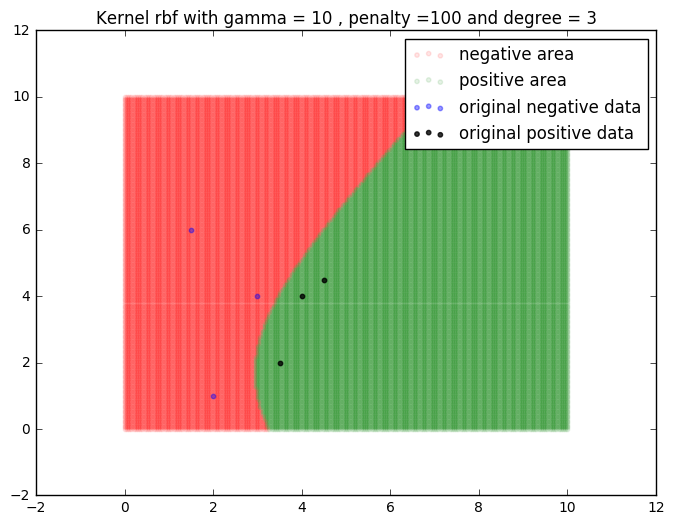

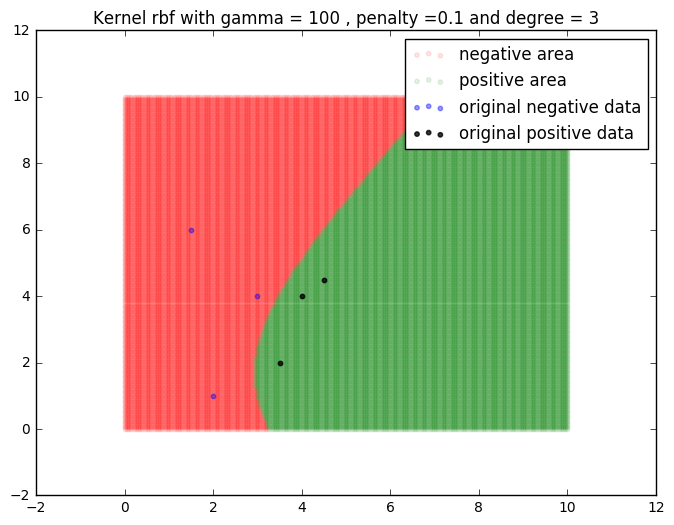

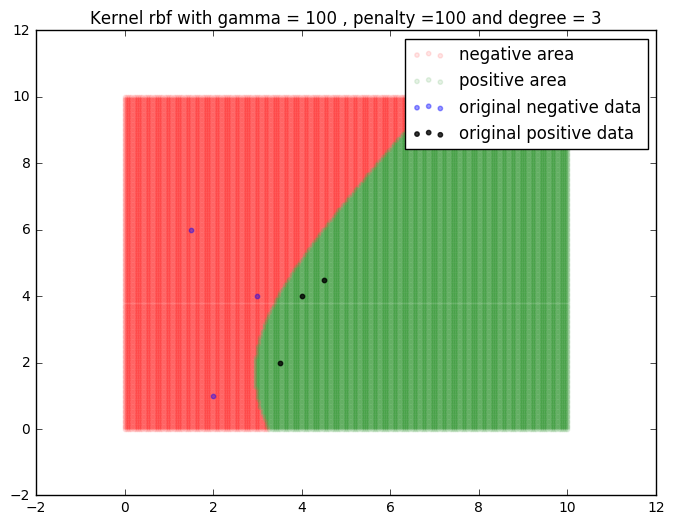

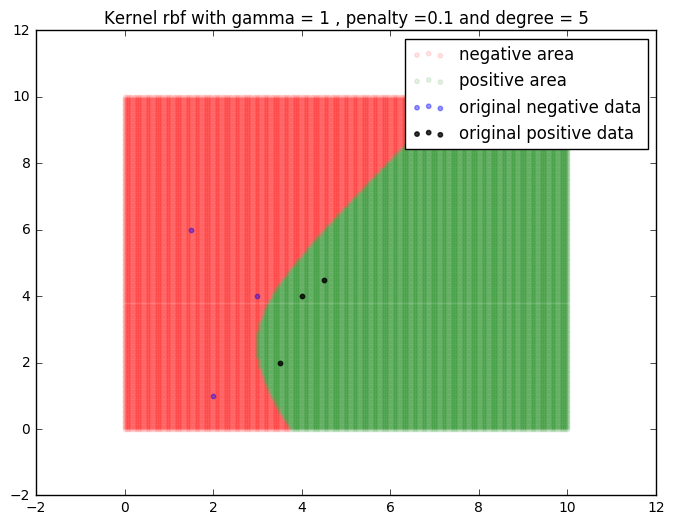

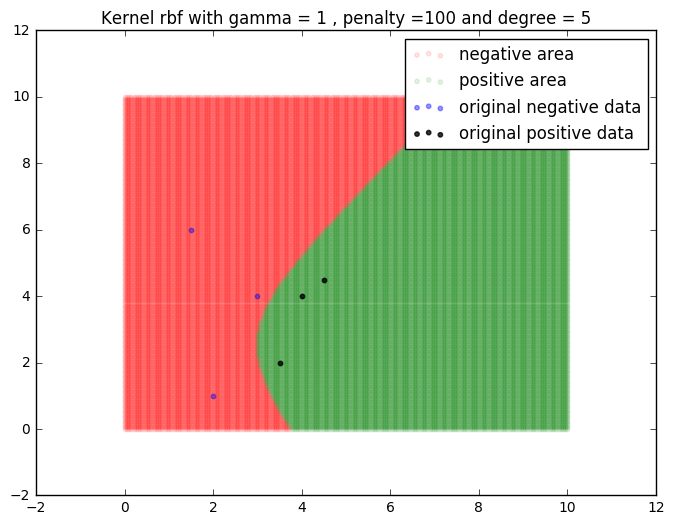

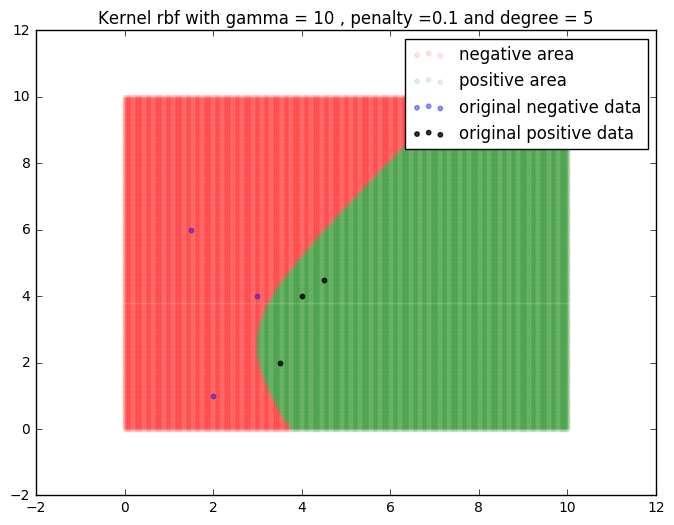

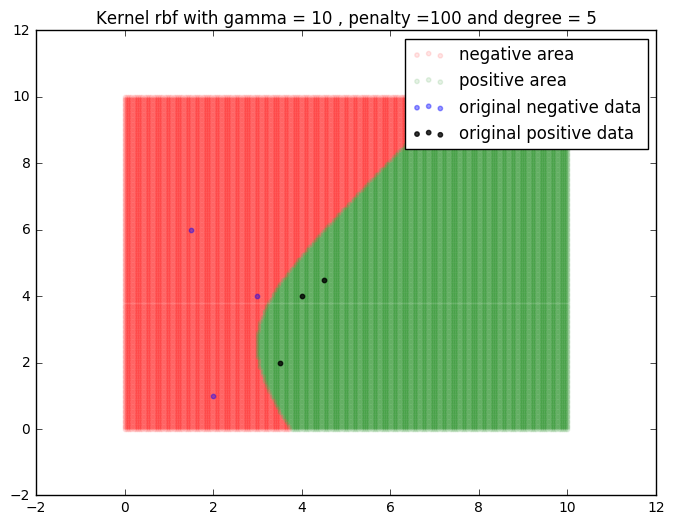

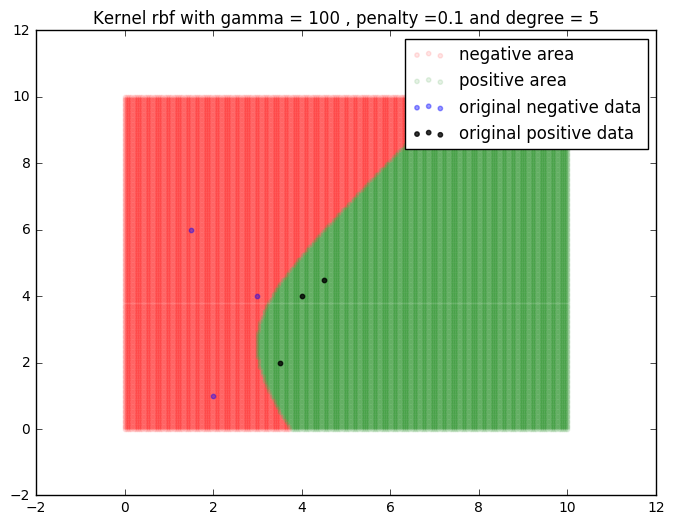

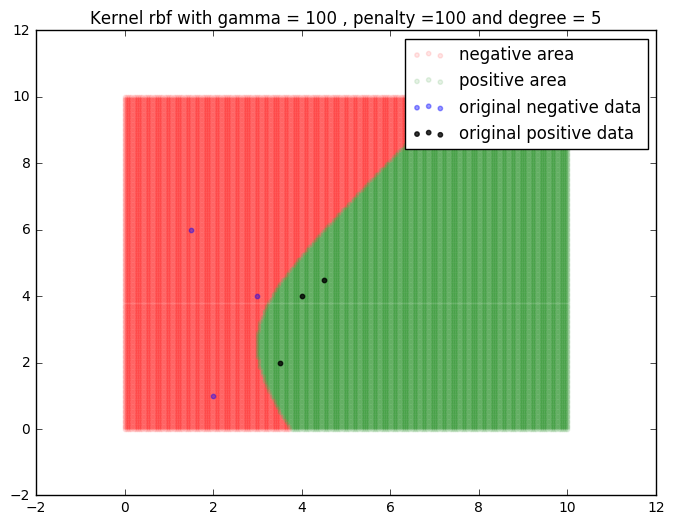

In [370]:
x = np.array([[1.5,6],[2,1],[3,4],[3.5,2],[4,4],[4.5,4.5]])
label = np.array([-1,-1,-1,1,1,1])
x_negative = [1.5,2,3]
x_positive = [3.5,4,4.5]
y_negative = [6,1,4]
y_positive = [2,4,4.5]

x1= np.linspace(0,10,200)
x2= np.linspace(0,10,200)
x_test = []

# craete a mesh (x1,x2)
for i in range(len(x1)):
    for j in range(len(x2)):
        x_test.append([x1[i],x2[j]])

x_test = np.array(x_test)


for degree in [1,3,5]:
    
    for gamma in [1,10,100]:
        
        for penalty in [0.1,100]:
    
            clf = svm.SVC(kernel='poly',degree=degree, gamma=gamma,C=penalty)
            clf.fit(x, label)

            y_test = clf.predict(x_test)

            x_test_negative = x_test[y_test==-1]
            y_test_negative = y_test[y_test==-1]
            x_test_positive = x_test[y_test==1]
            y_test_positive = y_test[y_test==1]
            plt.figure(figsize=(8,6))
            plt.scatter(x_test_negative[:,0], x_test_negative[:,1], s=10, color='red', alpha=0.1, label='negative area')
            plt.scatter(x_test_positive[:,0], x_test_positive[:,1], s=10, color='green', alpha=0.1, label='positive area')

            plt.scatter(x_negative, y_negative, s=10, color='b', alpha=0.4, label='original negative data')
            plt.scatter(x_positive, y_positive, s=10, color='black', alpha=0.8, label='original positive data')
            title = 'Kernel rbf with gamma = ' + str(gamma) + ' , penalty ='+ str(penalty) +' and degree = '+str(degree)
            plt.title(title)
            plt.legend()
            plt.show()